In [2]:
#import the relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#import the data
url_LondonHousePrices = "https://data.london.gov.uk/download/uk-house-price-index/70ac0766-8902-4eb5-aab5-01951aaed773/UK%20House%20price%20index.xls"
properties = pd.read_excel(url_LondonHousePrices, sheet_name='Average price', index_col= None)

In [4]:
#examine the data 
properties.head()

,Unnamed: 0,City of London,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,...,NORTH WEST,YORKS & THE HUMBER,EAST MIDLANDS,WEST MIDLANDS,EAST OF ENGLAND,LONDON,SOUTH EAST,SOUTH WEST,Unnamed: 47,England
0,NaT,E09000001,E09000002,E09000003,E09000004,E09000005,E09000006,E09000007,E09000008,E09000009,...,E12000002,E12000003,E12000004,E12000005,E12000006,E12000007,E12000008,E12000009,NaN,E92000001
1,1995-01-01,91448.98487,50460.2266,93284.51832,64958.09036,71306.56698,81671.47692,120932.8881,69158.16225,79885.89069,...,43958.48001,44803.42878,45544.52227,48527.52339,56701.5961,74435.76052,64018.87894,54705.1579,NaN,53202.77128
2,1995-02-01,82202.77314,51085.77983,93190.16963,64787.92069,72022.26197,81657.55944,119508.8622,68951.09542,80897.06551,...,43925.42289,44528.80721,46051.57066,49341.29029,56593.59475,72777.93709,63715.02399,54356.14843,NaN,53096.1549
3,1995-03-01,79120.70256,51268.96956,92247.52435,64367.49344,72015.76274,81449.31143,120282.2131,68712.44341,81379.86288,...,44434.8681,45200.46775,45383.82395,49442.17973,56171.18278,73896.84204,64113.60858,53583.07667,NaN,53201.2843
4,1995-04-01,77101.20804,53133.50526,90762.87492,64277.66881,72965.63094,81124.41227,120097.899,68610.04641,82188.90498,...,44267.7796,45614.34341,46124.23045,49455.93299,56567.89582,74455.28754,64623.22395,54786.01938,NaN,53590.8548


In [5]:
properties.shape #there are more columns than there are boroughs of London, so some of the columns must be redundant

(319, 49)

In [6]:
properties.index

RangeIndex(start=0, stop=319, step=1)

In [7]:
properties.columns 
#'City of London', and 'Unamed: 34' through 'England' aren't boroughs of London, so we'll have to remove those columns

Index(['Unnamed: 0', 'City of London', 'Barking & Dagenham', 'Barnet',
       'Bexley', 'Brent', 'Bromley', 'Camden', 'Croydon', 'Ealing', 'Enfield',
       'Greenwich', 'Hackney', 'Hammersmith & Fulham', 'Haringey', 'Harrow',
       'Havering', 'Hillingdon', 'Hounslow', 'Islington',
       'Kensington & Chelsea', 'Kingston upon Thames', 'Lambeth', 'Lewisham',
       'Merton', 'Newham', 'Redbridge', 'Richmond upon Thames', 'Southwark',
       'Sutton', 'Tower Hamlets', 'Waltham Forest', 'Wandsworth',
       'Westminster', 'Unnamed: 34', 'Inner London', 'Outer London',
       'Unnamed: 37', 'NORTH EAST', 'NORTH WEST', 'YORKS & THE HUMBER',
       'EAST MIDLANDS', 'WEST MIDLANDS', 'EAST OF ENGLAND', 'LONDON',
       'SOUTH EAST', 'SOUTH WEST', 'Unnamed: 47', 'England'],
      dtype='object')

In [8]:
#most of the values in the data frame have the data type 'object', rather than 'float64'; we'll need to fix this 
#before performing any calculations
properties.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319 entries, 0 to 318
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Unnamed: 0            318 non-null    datetime64[ns]
 1   City of London        319 non-null    object        
 2   Barking & Dagenham    319 non-null    object        
 3   Barnet                319 non-null    object        
 4   Bexley                319 non-null    object        
 5   Brent                 319 non-null    object        
 6   Bromley               319 non-null    object        
 7   Camden                319 non-null    object        
 8   Croydon               319 non-null    object        
 9   Ealing                319 non-null    object        
 10  Enfield               319 non-null    object        
 11  Greenwich             319 non-null    object        
 12  Hackney               319 non-null    object        
 13  Hammersmith & Fulham

In [9]:
properties.drop(0, inplace=True) #remove the row of postcodes, which aren't relevant for the current analysis

In [10]:
london_props = properties.loc[:, 'Unnamed: 0':'Westminster'] #remove the columns that aren't boroughs of London
london_props.drop('City of London', axis=1, inplace=True) 
london_props.head()

,Unnamed: 0,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,Enfield,...,Merton,Newham,Redbridge,Richmond upon Thames,Southwark,Sutton,Tower Hamlets,Waltham Forest,Wandsworth,Westminster
1,1995-01-01,50460.2266,93284.51832,64958.09036,71306.56698,81671.47692,120932.8881,69158.16225,79885.89069,72514.69096,...,82070.6133,53539.31919,72189.58437,109326.1245,67885.20344,71536.97357,59865.18995,61319.44913,88559.04381,133025.2772
2,1995-02-01,51085.77983,93190.16963,64787.92069,72022.26197,81657.55944,119508.8622,68951.09542,80897.06551,73155.19746,...,79982.74872,53153.88306,72141.6261,111103.0394,64799.0648,70893.20851,62318.53353,60252.12246,88641.01678,131468.3096
3,1995-03-01,51268.96956,92247.52435,64367.49344,72015.76274,81449.31143,120282.2131,68712.44341,81379.86288,72190.44144,...,80661.68279,53458.26393,72501.35502,107325.4742,65763.29719,70306.83844,63938.67686,60871.08493,87124.81523,132260.3417
4,1995-04-01,53133.50526,90762.87492,64277.66881,72965.63094,81124.41227,120097.899,68610.04641,82188.90498,71442.92235,...,79990.54333,54479.75395,72228.60295,106875,63073.62117,69411.9439,66233.19383,60971.39722,87026.00225,133370.2036
5,1995-05-01,53042.24852,90258.00033,63997.13588,73704.04743,81542.61561,119929.2782,68844.9169,82077.05525,70630.77955,...,80873.98643,55803.95958,72366.64122,107707.6799,64420.49933,69759.21989,66432.85846,61494.16938,86518.05945,133911.1117


In [11]:
london_props['Month'] = london_props['Unnamed: 0'].dt.month #create columns for the month and year, which will serve as the new index
london_props['Year'] = london_props['Unnamed: 0'].dt.year
london_props.head()

,Unnamed: 0,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,Enfield,...,Redbridge,Richmond upon Thames,Southwark,Sutton,Tower Hamlets,Waltham Forest,Wandsworth,Westminster,Month,Year
1,1995-01-01,50460.2266,93284.51832,64958.09036,71306.56698,81671.47692,120932.8881,69158.16225,79885.89069,72514.69096,...,72189.58437,109326.1245,67885.20344,71536.97357,59865.18995,61319.44913,88559.04381,133025.2772,1,1995
2,1995-02-01,51085.77983,93190.16963,64787.92069,72022.26197,81657.55944,119508.8622,68951.09542,80897.06551,73155.19746,...,72141.6261,111103.0394,64799.0648,70893.20851,62318.53353,60252.12246,88641.01678,131468.3096,2,1995
3,1995-03-01,51268.96956,92247.52435,64367.49344,72015.76274,81449.31143,120282.2131,68712.44341,81379.86288,72190.44144,...,72501.35502,107325.4742,65763.29719,70306.83844,63938.67686,60871.08493,87124.81523,132260.3417,3,1995
4,1995-04-01,53133.50526,90762.87492,64277.66881,72965.63094,81124.41227,120097.899,68610.04641,82188.90498,71442.92235,...,72228.60295,106875,63073.62117,69411.9439,66233.19383,60971.39722,87026.00225,133370.2036,4,1995
5,1995-05-01,53042.24852,90258.00033,63997.13588,73704.04743,81542.61561,119929.2782,68844.9169,82077.05525,70630.77955,...,72366.64122,107707.6799,64420.49933,69759.21989,66432.85846,61494.16938,86518.05945,133911.1117,5,1995


In [12]:
london_props = london_props.set_index(['Year', 'Month']) #reindex the data frame by year and month
london_props.head()

Unnamed: 0 Barking & Dagenham       Barnet       Bexley  \
Year Month                                                           
1995 1     1995-01-01         50460.2266  93284.51832  64958.09036   
     2     1995-02-01        51085.77983  93190.16963  64787.92069   
     3     1995-03-01        51268.96956  92247.52435  64367.49344   
     4     1995-04-01        53133.50526  90762.87492  64277.66881   
     5     1995-05-01        53042.24852  90258.00033  63997.13588   

                  Brent      Bromley       Camden      Croydon       Ealing  \
Year Month                                                                    
1995 1      71306.56698  81671.47692  120932.8881  69158.16225  79885.89069   
     2      72022.26197  81657.55944  119508.8622  68951.09542  80897.06551   
     3      72015.76274  81449.31143  120282.2131  68712.44341  81379.86288   
     4      72965.63094  81124.41227   120097.899  68610.04641  82188.90498   
     5      73704.04743  81542.61561  119929.2782   68844.9169  82077.05525   

                Enfield  ...       Merton       Newham    Redbridge  \
Year Month               ...                                          
1995 1      72514.69096  ...   82070.6133  53539.31919  72189.58437   
     2      73155.19746  ...  79982.74872  53153.88306   72141.6261   
     3      72190.44144  ...  80661.68279  53458.26393  72501.35502   
     4      71442.92235  ...  79990.54333  54479.75395  72228.60295   
     5      70630.77955  ...  80873.98643  55803.95958  72366.64122   

           Richmond upon Thames    Southwark       Sutton Tower Hamlets  \
Year Month                                                                
1995 1              109326.1245  67885.20344  71536.97357   59865.18995   
     2              111103.0394   64799.0648  70893.20851   62318.53353   
     3              107325.4742  65763.29719  70306.83844   63938.67686   
     4                   106875  63073.62117   69411.9439   66233.19383   
     5              107707.6799  64420.49933  69759.21989   66432.85846   

           Waltham Forest   Wandsworth  Westminster  
Year Month                                           
1995 1        61319.44913  88559.04381  133025.2772  
     2        60252.12246  88641.01678  131468.3096  
     3        60871.08493  87124.81523  132260.3417  
     4        60971.39722  87026.00225  133370.2036  
     5        61494.16938  86518.05945  133911.1117  

[5 rows x 33 columns]

In [13]:
london_props.drop('Unnamed: 0', axis=1, inplace=True) #drop the now-redundant 'Unnamed: 0' column
london_props.head()

Barking & Dagenham       Barnet       Bexley        Brent  \
Year Month                                                             
1995 1             50460.2266  93284.51832  64958.09036  71306.56698   
     2            51085.77983  93190.16963  64787.92069  72022.26197   
     3            51268.96956  92247.52435  64367.49344  72015.76274   
     4            53133.50526  90762.87492  64277.66881  72965.63094   
     5            53042.24852  90258.00033  63997.13588  73704.04743   

                Bromley       Camden      Croydon       Ealing      Enfield  \
Year Month                                                                    
1995 1      81671.47692  120932.8881  69158.16225  79885.89069  72514.69096   
     2      81657.55944  119508.8622  68951.09542  80897.06551  73155.19746   
     3      81449.31143  120282.2131  68712.44341  81379.86288  72190.44144   
     4      81124.41227   120097.899  68610.04641  82188.90498  71442.92235   
     5      81542.61561  119929.2782   68844.9169  82077.05525  70630.77955   

              Greenwich  ...       Merton       Newham    Redbridge  \
Year Month               ...                                          
1995 1      62300.10169  ...   82070.6133  53539.31919  72189.58437   
     2      60993.26863  ...  79982.74872  53153.88306   72141.6261   
     3      61377.83464  ...  80661.68279  53458.26393  72501.35502   
     4       61927.7246  ...  79990.54333  54479.75395  72228.60295   
     5      63512.99103  ...  80873.98643  55803.95958  72366.64122   

           Richmond upon Thames    Southwark       Sutton Tower Hamlets  \
Year Month                                                                
1995 1              109326.1245  67885.20344  71536.97357   59865.18995   
     2              111103.0394   64799.0648  70893.20851   62318.53353   
     3              107325.4742  65763.29719  70306.83844   63938.67686   
     4                   106875  63073.62117   69411.9439   66233.19383   
     5              107707.6799  64420.49933  69759.21989   66432.85846   

           Waltham Forest   Wandsworth  Westminster  
Year Month                                           
1995 1        61319.44913  88559.04381  133025.2772  
     2        60252.12246  88641.01678  131468.3096  
     3        60871.08493  87124.81523  132260.3417  
     4        60971.39722  87026.00225  133370.2036  
     5        61494.16938  86518.05945  133911.1117  

[5 rows x 32 columns]

In [14]:
london_props = london_props.apply(pd.to_numeric) #convert the values in the data frame from object to float64
london_props.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 318 entries, (1995, 1) to (2021, 6)
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Barking & Dagenham    318 non-null    float64
 1   Barnet                318 non-null    float64
 2   Bexley                318 non-null    float64
 3   Brent                 318 non-null    float64
 4   Bromley               318 non-null    float64
 5   Camden                318 non-null    float64
 6   Croydon               318 non-null    float64
 7   Ealing                318 non-null    float64
 8   Enfield               318 non-null    float64
 9   Greenwich             318 non-null    float64
 10  Hackney               318 non-null    float64
 11  Hammersmith & Fulham  318 non-null    float64
 12  Haringey              318 non-null    float64
 13  Harrow                318 non-null    float64
 14  Havering              318 non-null    float64
 15  Hillingdo

In [15]:
london_props.isna().sum() #check whether there are any missing entries; thankfully there aren't any

Barking & Dagenham      0
Barnet                  0
Bexley                  0
Brent                   0
Bromley                 0
Camden                  0
Croydon                 0
Ealing                  0
Enfield                 0
Greenwich               0
Hackney                 0
Hammersmith & Fulham    0
Haringey                0
Harrow                  0
Havering                0
Hillingdon              0
Hounslow                0
Islington               0
Kensington & Chelsea    0
Kingston upon Thames    0
Lambeth                 0
Lewisham                0
Merton                  0
Newham                  0
Redbridge               0
Richmond upon Thames    0
Southwark               0
Sutton                  0
Tower Hamlets           0
Waltham Forest          0
Wandsworth              0
Westminster             0
dtype: int64

In [16]:
#define a function that calculates the change in average price for an individual borough from year1 to year2 as a 
#percentage
def create_price_ratio(borough, year1, year2):
    return 100 * london_props.loc[year2, borough].agg('mean') / london_props.loc[year1, borough].agg('mean')
    

In [17]:
#use create_price_ratio to create a dictionary with the boroughs of London as keys and the change in average price
#between 2000 and 2020 as values, which will serve as the basis of a Pandas DataFrame
increase = {borough : [create_price_ratio(borough, 2000, 2020)] for borough in london_props.columns}
increase

{'Barking & Dagenham': [389.61309290034524],
 'Barnet': [313.05268090075833],
 'Bexley': [332.4507532661672],
 'Brent': [344.66707797246966],
 'Bromley': [294.1011940274817],
 'Camden': [335.8211634121892],
 'Croydon': [315.70429428061266],
 'Ealing': [312.8507691877485],
 'Enfield': [325.01203164980456],
 'Greenwich': [358.9197468705285],
 'Hackney': [438.71495996664805],
 'Hammersmith & Fulham': [294.59947465596764],
 'Haringey': [383.33156106431727],
 'Harrow': [297.2866789022872],
 'Havering': [338.4355803290574],
 'Hillingdon': [311.813602657781],
 'Hounslow': [300.3028509770513],
 'Islington': [344.05347479303117],
 'Kensington & Chelsea': [352.0050651196418],
 'Kingston upon Thames': [301.16761858514104],
 'Lambeth': [356.826219127353],
 'Lewisham': [394.9339264907722],
 'Merton': [345.5262461920127],
 'Newham': [399.87452337591617],
 'Redbridge': [340.3226921973981],
 'Richmond upon Thames': [298.8355832791291],
 'Southwark': [359.0928824874734],
 'Sutton': [300.28483837602295]

In [18]:
increase_df = pd.DataFrame(increase, index=['Increase']) #convert the dictionary into a DataFrame
transposed = increase_df.T.sort_values('Increase') #transpose the values to make plotting the data easier

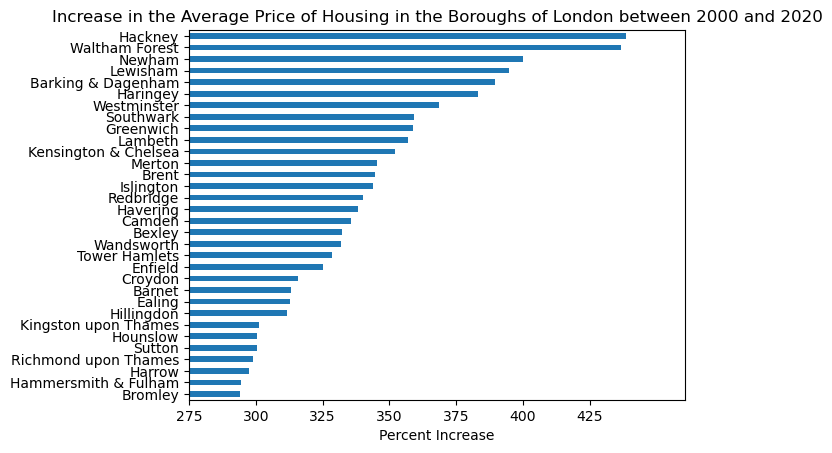

In [19]:
#Since we're interested in the relationship between a categorical variable and a numeric one a bar chart is a good 
#choice.
transposed.plot(kind='barh', legend=None) 
plt.title('Increase in the Average Price of Housing in the Boroughs of London between 2000 and 2020')
plt.xlabel('Percent Increase')
plt.xlim(xmin=275) #start the y-axis at 275 in order to get a clearer sense of the differences between boroughs 
#and make the chart easier to read 
plt.xticks(range(275, 450, 25))
plt.show()
#From the chart, we can see that the average price of housing increased the most in Hackney from 2000 to 2020. 

In [20]:
#Now we can generalize the results by defining a function that will graph the change in average price for every 
#borough of London between for any two years between 1995 and 2021. 
def grapher(year1, year2):
        increase = {borough : [100 * london_props.loc[year2, borough].agg('mean') / london_props.loc[year1, borough].agg('mean')] for borough in london_props.columns}
        increase_df = pd.DataFrame(increase, index=['Increase'])
        transposed = increase_df.T.sort_values('Increase')
        transposed.plot(kind='barh', legend=None)
        plt.title('Increase in the Average Price of Housing in the Boroughs of London between ' + str(year1) + ' and ' + str(year2))
        plt.xlabel('Percent Increase')
        plt.xlim(xmin=int(min(transposed['Increase']) - 25))
        plt.xticks(range(int(min(transposed['Increase']))-25, int(max(transposed['Increase'])), 25))
        plt.show()


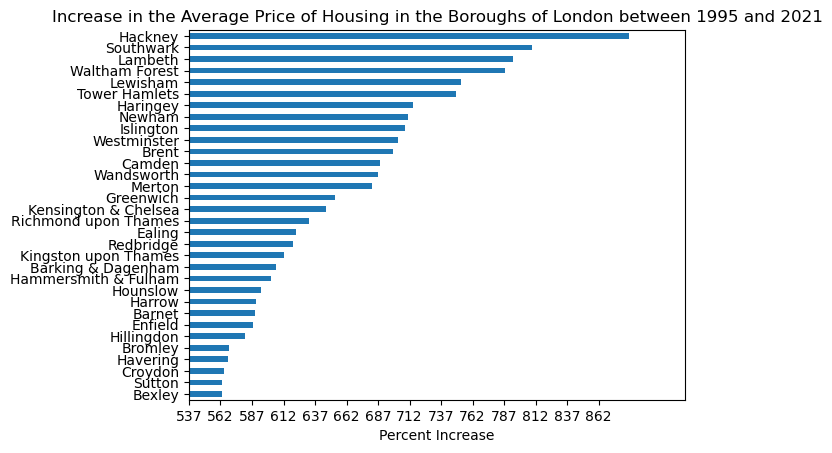

In [21]:
grapher(1995, 2021)

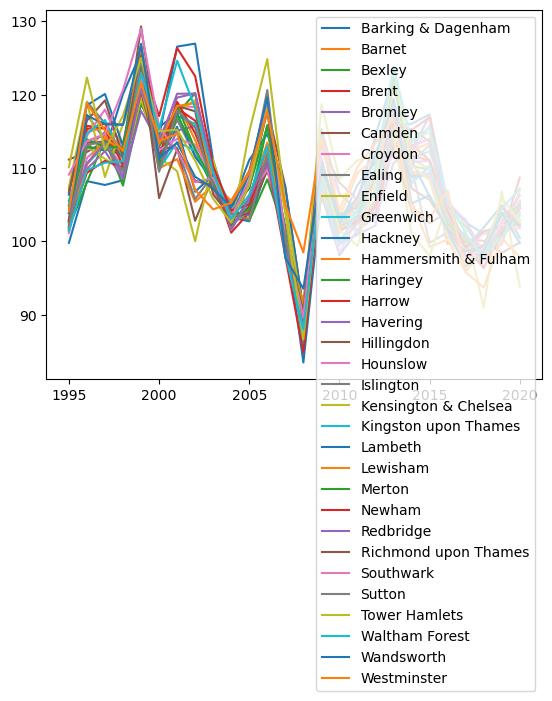

In [22]:
#Just for fun I created a line chart showing the year to year change in average price for each borough.
years = [i for i in range(1995, 2021)]
year_to_year = {borough : [create_price_ratio(borough, year, year + 1) for year in years] for borough in london_props.columns}
year_to_year_df = pd.DataFrame(year_to_year, index=years)
year_to_year_df.plot()
plt.show()
